In [121]:
# 初始化处理
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["font.sans-serif"] = ["SimHei", "Arial Unicode MS", "DejaVu Sans"]
plt.rcParams["axes.unicode_minus"] = False
df = pd.read_csv("../data/train.csv")

In [122]:
# 查看数据基本信息
print("数据集基本信息：")
print(df.info())

# 查看数据描述性统计
print("\n描述性统计：")
print(df.describe())

数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18 

缺失值统计：
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

缺失值比例：
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


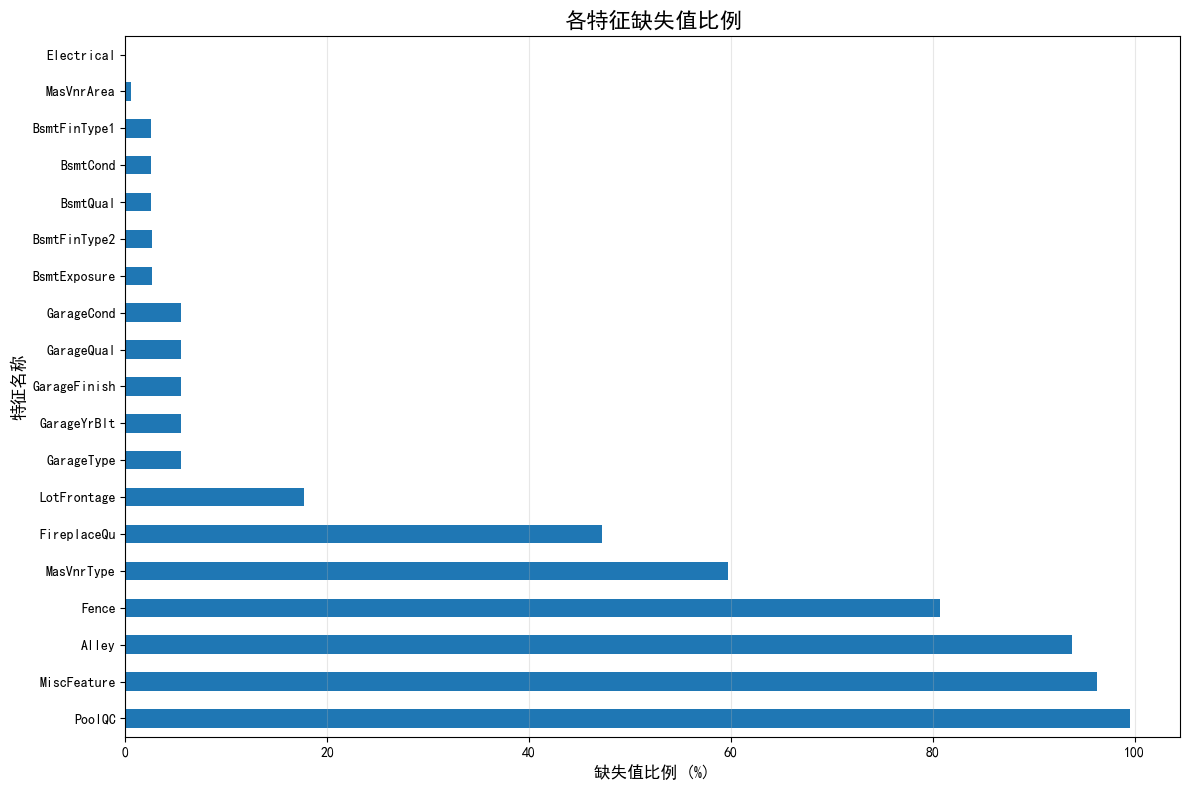


删除缺失比例大于95%的列: ['PoolQC', 'MiscFeature']


In [123]:
# 检测缺失值
print("缺失值统计：")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

# 缺失值比例
print("\n缺失值比例：")
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)
print(missing_percentage)
# 绘制缺失值比例条形图
plt.figure(figsize=(12, 8))
missing_percentage.plot(kind="barh")
plt.title("各特征缺失值比例", fontsize=16)
plt.xlabel("缺失值比例 (%)", fontsize=12)
plt.ylabel("特征名称", fontsize=12)
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

# 处理缺失值
# 先找出缺失比例大于95%的列并删除
high_missing_cols = missing_percentage[missing_percentage > 95].index.tolist()
if high_missing_cols:
    print(f"\n删除缺失比例大于95%的列: {high_missing_cols}")
    df.drop(columns=high_missing_cols, inplace=True)
    
# 分别处理数值型和分类型特征
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

# 对数值型特征使用KNN填充
if len(numeric_columns) > 0:
    # 先用中位数填充，确保KNN能够运行
    for col in numeric_columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

    # 使用KNN进一步优化填充
    knn_imputer = KNNImputer(n_neighbors=5)
    df[numeric_columns] = knn_imputer.fit_transform(df[numeric_columns])

# 对于分类特征，标记为"Unknown"
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna("Unknown", inplace=True)


使用Z-Score方法检测异常值：
Id 的异常值数量: 0
MSSubClass 的异常值数量: 30
LotFrontage 的异常值数量: 16
LotArea 的异常值数量: 13
OverallQual 的异常值数量: 2
OverallCond 的异常值数量: 28
YearBuilt 的异常值数量: 6
YearRemodAdd 的异常值数量: 0
MasVnrArea 的异常值数量: 32
BsmtFinSF1 的异常值数量: 6
BsmtFinSF2 的异常值数量: 50
BsmtUnfSF 的异常值数量: 11
TotalBsmtSF 的异常值数量: 10
1stFlrSF 的异常值数量: 12
2ndFlrSF 的异常值数量: 4
LowQualFinSF 的异常值数量: 20
GrLivArea 的异常值数量: 16
BsmtFullBath 的异常值数量: 16
BsmtHalfBath 的异常值数量: 82
FullBath 的异常值数量: 0
HalfBath 的异常值数量: 12
BedroomAbvGr 的异常值数量: 14
KitchenAbvGr 的异常值数量: 68
TotRmsAbvGrd 的异常值数量: 12
Fireplaces 的异常值数量: 5
GarageYrBlt 的异常值数量: 2
GarageCars 的异常值数量: 0
GarageArea 的异常值数量: 7
WoodDeckSF 的异常值数量: 22
OpenPorchSF 的异常值数量: 27
EnclosedPorch 的异常值数量: 51
3SsnPorch 的异常值数量: 23
ScreenPorch 的异常值数量: 55
PoolArea 的异常值数量: 7
MiscVal 的异常值数量: 8
MoSold 的异常值数量: 0
YrSold 的异常值数量: 0
SalePrice 的异常值数量: 22


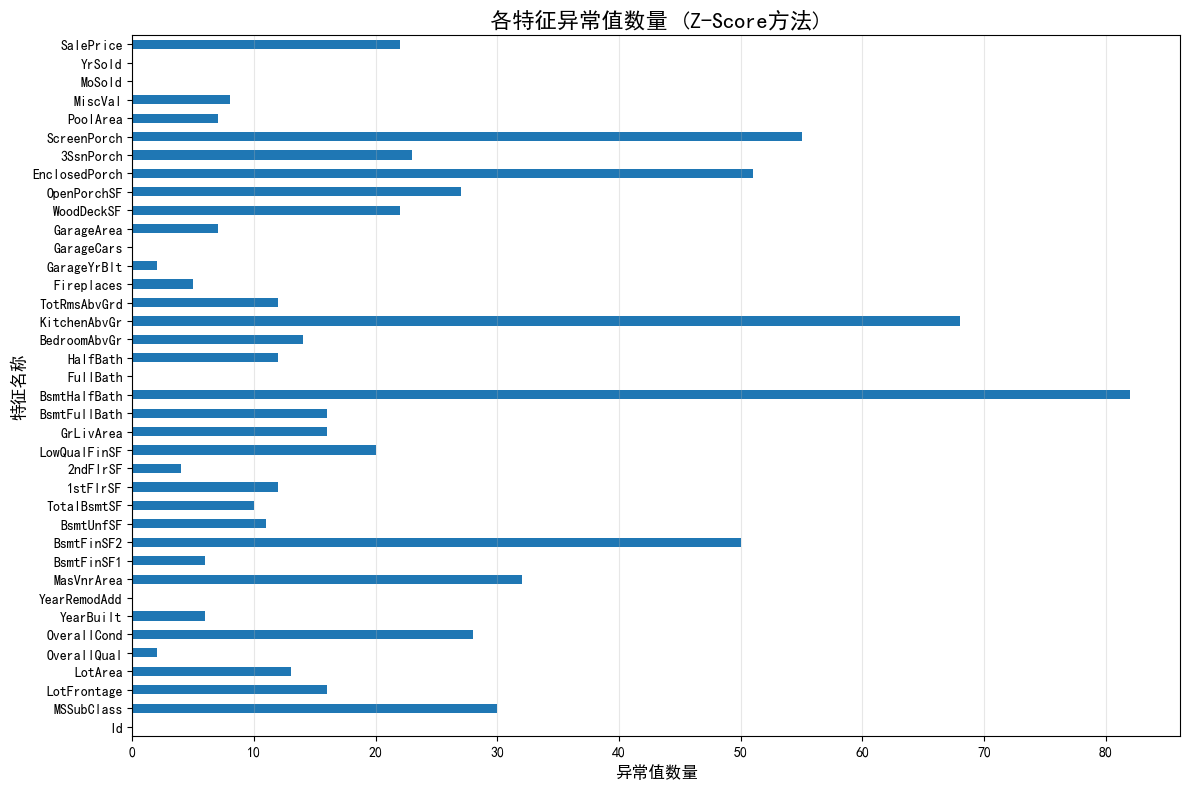


使用Z-score法处理异常值
Id: 将 0 个异常值限制在 [-534.33, 1995.33] 范围内
MSSubClass: 将 30 个异常值限制在 [-70.00, 183.80] 范围内
LotFrontage: 将 16 个异常值限制在 [3.78, 135.95] 范围内
LotArea: 将 13 个异常值限制在 [-19426.97, 40460.62] 范围内
OverallQual: 将 2 个异常值限制在 [1.95, 10.25] 范围内
OverallCond: 将 28 个异常值限制在 [2.24, 8.91] 范围内
YearBuilt: 将 6 个异常值限制在 [1880.66, 2061.88] 范围内
YearRemodAdd: 将 0 个异常值限制在 [1922.93, 2046.80] 范围内
MasVnrArea: 将 32 个异常值限制在 [-439.08, 645.31] 范围内
BsmtFinSF1: 将 6 个异常值限制在 [-924.65, 1811.93] 范围内
BsmtFinSF2: 将 50 个异常值限制在 [-437.41, 530.51] 范围内
BsmtUnfSF: 将 11 个异常值限制在 [-758.36, 1892.84] 范围内
TotalBsmtSF: 将 10 个异常值限制在 [-258.69, 2373.55] 范围内
1stFlrSF: 将 12 个异常值限制在 [2.86, 2322.39] 范围内
2ndFlrSF: 将 4 个异常值限制在 [-962.59, 1656.58] 范围内
LowQualFinSF: 将 20 个异常值限制在 [-140.02, 151.71] 范围内
GrLivArea: 将 16 个异常值限制在 [-60.98, 3091.90] 范围内
BsmtFullBath: 将 16 个异常值限制在 [-1.13, 1.98] 范围内
BsmtHalfBath: 将 82 个异常值限制在 [-0.66, 0.77] 范围内
FullBath: 将 0 个异常值限制在 [-0.09, 3.22] 范围内
HalfBath: 将 12 个异常值限制在 [-1.13, 1.89] 范围内
BedroomAbvGr: 将 14 个异常值限制在 [0.42,

In [124]:
# Z-Score方法检测异常值
numeric_cols = df.select_dtypes(include=[np.number]).columns

print("\n使用Z-Score方法检测异常值：")
zscore_outliers_count = {}
for col in numeric_cols:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers = df[z_scores > 3]
    zscore_outliers_count[col] = len(outliers)
    print(f"{col} 的异常值数量: {len(outliers)}")

# 绘制Z-Score异常值数量条形图
plt.figure(figsize=(12, 8))
zscore_outliers_series = pd.Series(zscore_outliers_count)
zscore_outliers_series.plot(kind="barh")
plt.title("各特征异常值数量 (Z-Score方法)", fontsize=16)
plt.xlabel("异常值数量", fontsize=12)
plt.ylabel("特征名称", fontsize=12)
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

# 使用Z-score法处理异常值
print("\n使用Z-score法处理异常值")

for col in numeric_cols:
    # 计算Z-score
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers_mask = z_scores > 3

    # 将异常值替换为边界值
    mean_val = df[col].mean()
    std_val = df[col].std()
    lower_bound = mean_val - 3 * std_val
    upper_bound = mean_val + 3 * std_val

    # 将超出边界的值替换为边界值
    df.loc[z_scores > 3, col] = np.clip(df.loc[z_scores > 3, col], lower_bound, upper_bound)
    
    # 或者分别替换上下边界外的值
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

    print(f"{col}: 将 {outliers_mask.sum()} 个异常值限制在 [{lower_bound:.2f}, {upper_bound:.2f}] 范围内")

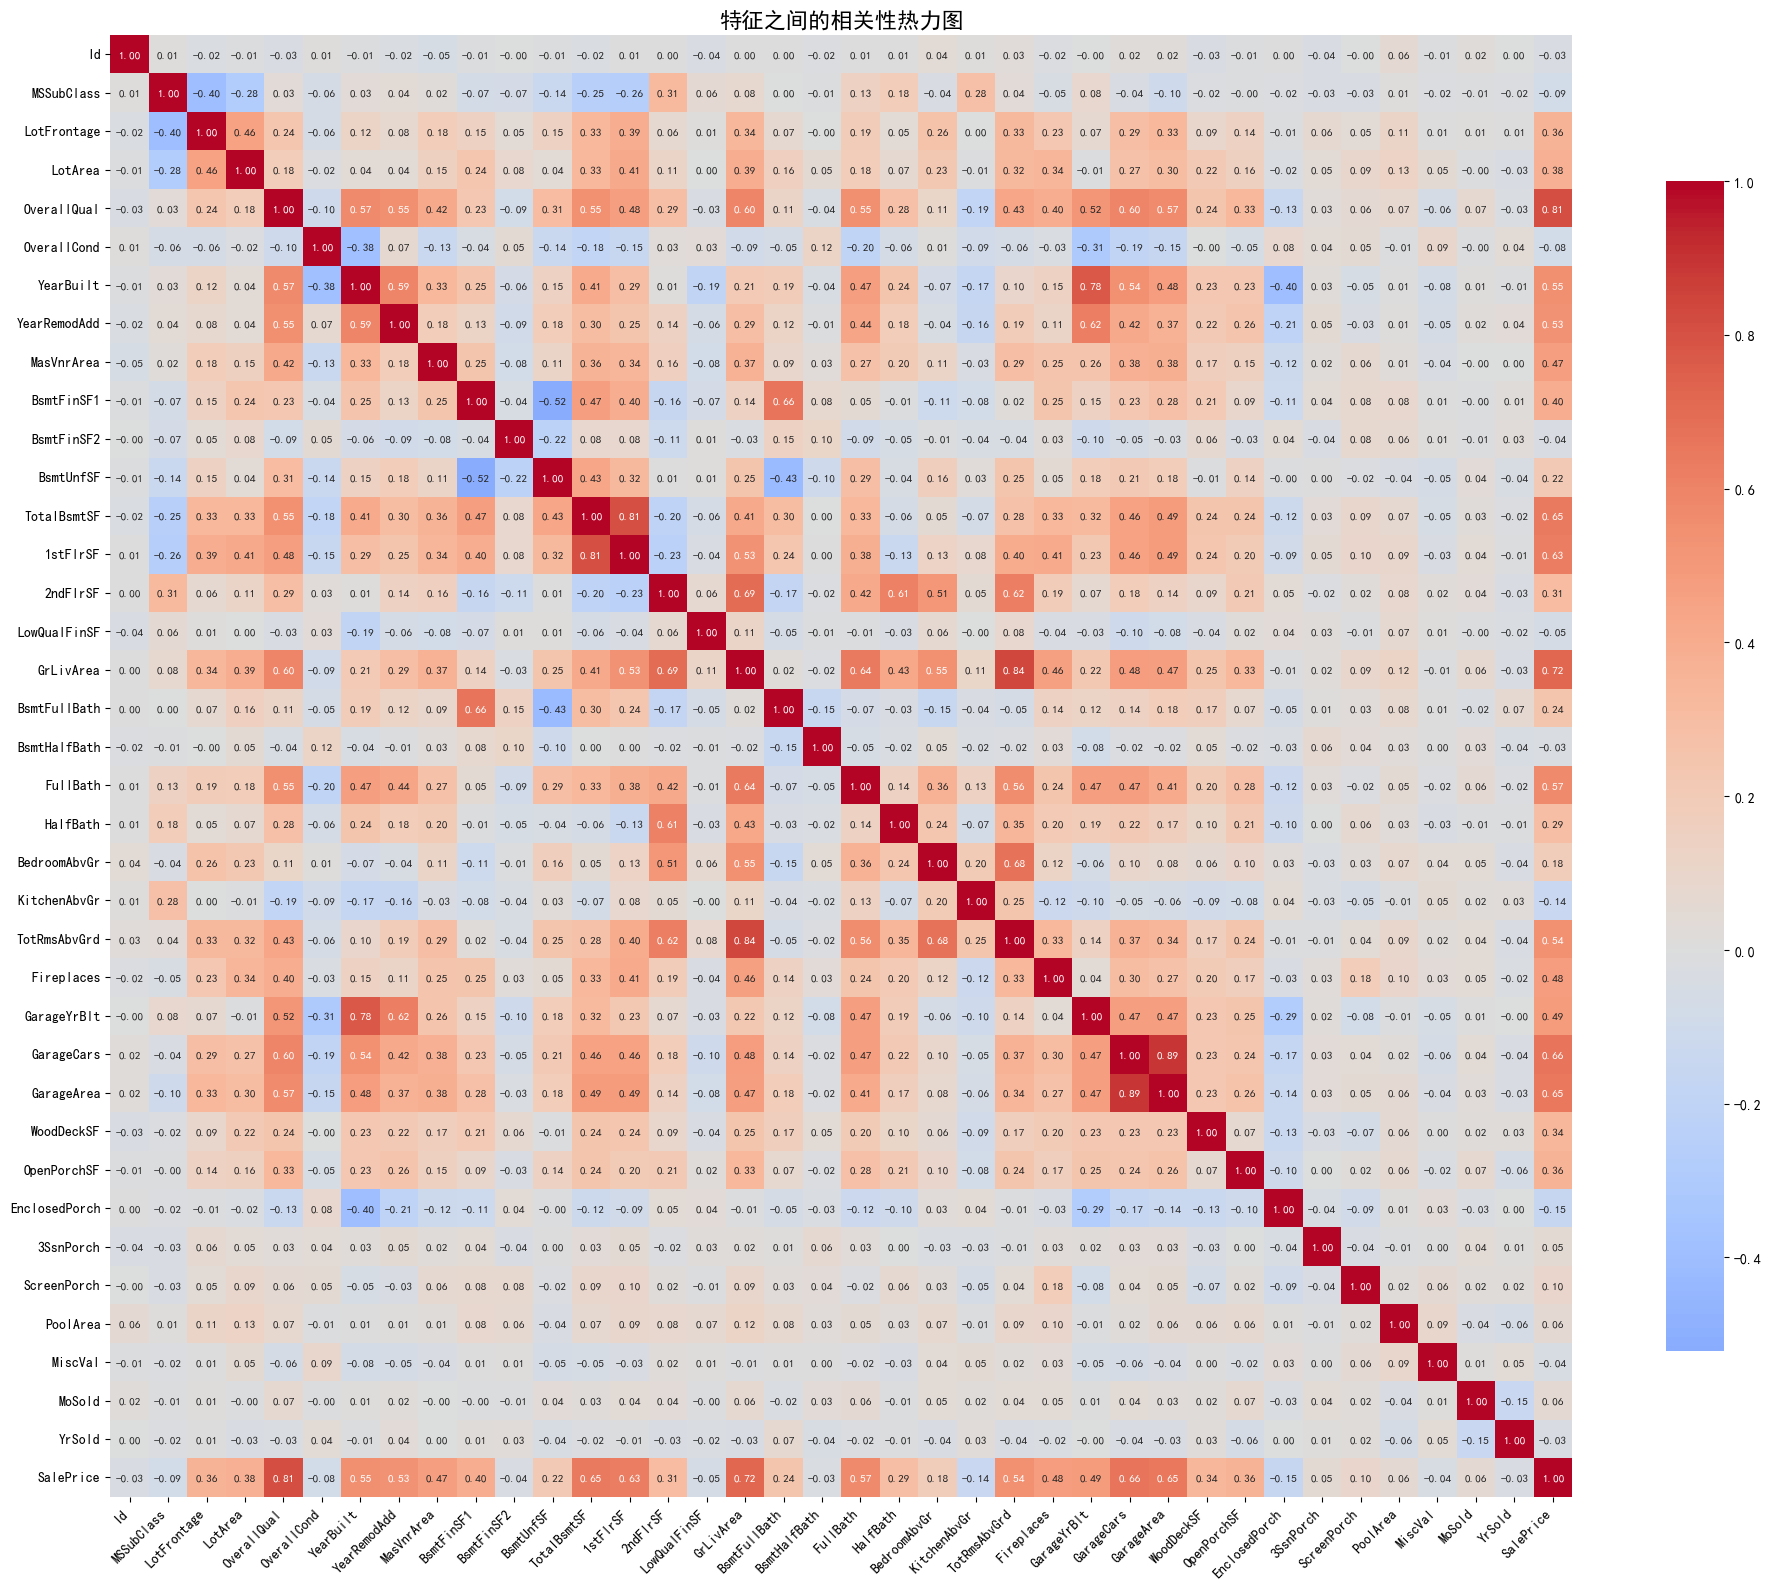

强相关特征对（|r| > 0.5）：
OverallQual 与 YearBuilt: 0.574
OverallQual 与 YearRemodAdd: 0.551
OverallQual 与 TotalBsmtSF: 0.546
OverallQual 与 GrLivArea: 0.596
OverallQual 与 FullBath: 0.551
OverallQual 与 GarageYrBlt: 0.516
OverallQual 与 GarageCars: 0.600
OverallQual 与 GarageArea: 0.566
OverallQual 与 SalePrice: 0.811
YearBuilt 与 YearRemodAdd: 0.594
YearBuilt 与 GarageYrBlt: 0.778
YearBuilt 与 GarageCars: 0.538
YearBuilt 与 SalePrice: 0.550
YearRemodAdd 与 GarageYrBlt: 0.617
YearRemodAdd 与 SalePrice: 0.534
BsmtFinSF1 与 BsmtUnfSF: -0.521
BsmtFinSF1 与 BsmtFullBath: 0.663
TotalBsmtSF 与 1stFlrSF: 0.807
TotalBsmtSF 与 SalePrice: 0.649
1stFlrSF 与 GrLivArea: 0.534
1stFlrSF 与 SalePrice: 0.629
2ndFlrSF 与 GrLivArea: 0.692
2ndFlrSF 与 HalfBath: 0.613
2ndFlrSF 与 BedroomAbvGr: 0.512
2ndFlrSF 与 TotRmsAbvGrd: 0.616
GrLivArea 与 FullBath: 0.642
GrLivArea 与 BedroomAbvGr: 0.545
GrLivArea 与 TotRmsAbvGrd: 0.838
GrLivArea 与 SalePrice: 0.722
FullBath 与 TotRmsAbvGrd: 0.557
FullBath 与 SalePrice: 0.569
BedroomAbvGr 与 TotRmsAbvGrd:

In [125]:
# 只计算数值型变量的相关性
correlation_matrix = df[numeric_cols].corr()

# 绘制热力图
plt.figure(figsize=(20, 16))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8},
)
plt.title("特征之间的相关性热力图", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# 找出所有 |r| > 0.5 的特征对
strong_pairs = []
for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        col1, col2 = numeric_cols[i], numeric_cols[j]
        corr = correlation_matrix.loc[col1, col2]
        if abs(corr) > 0.5:
            strong_pairs.append((col1, col2, corr))

# 显示结果
print("强相关特征对（|r| > 0.5）：")
for pair in strong_pairs:
    print(f"{pair[0]} 与 {pair[1]}: {pair[2]:.3f}")

In [126]:
# 创建标准化器
scaler = StandardScaler()

# 对 SalePrice 进行标准化（z-score 标准化）
df["price_scaled"] = scaler.fit_transform(df[["SalePrice"]])

print("标准化后的 price 前几项：")
print(df["price_scaled"].head())

# 查看标准化统计信息
print("\n标准化后的统计信息：")
print(df["price_scaled"].describe())

标准化后的 price 前几项：
0    0.395922
1    0.027149
2    0.600796
3   -0.539668
4    0.962739
Name: price_scaled, dtype: float64

标准化后的统计信息：
count    1.460000e+03
mean    -3.406712e-17
std      1.000343e+00
min     -1.975150e+00
25%     -6.765923e-01
50%     -2.255285e-01
75%      4.710422e-01
max      3.274380e+00
Name: price_scaled, dtype: float64


In [127]:
# 使用等宽分桶对数据离散化
bins = [0, 150000, 300000, np.inf]
labels = ["低价（0-150K）", "中价（150K-300K）", "高价（300K以上）"]
df["price_level"] = pd.cut(df["SalePrice"], bins=bins, labels=labels)

print("价格等级分布：")
print(df["price_level"].value_counts())

价格等级分布：
price_level
中价（150K-300K）    726
低价（0-150K）       619
高价（300K以上）       115
Name: count, dtype: int64


In [128]:
# 获取 price 与其他特征的相关性排序
price_corr = correlation_matrix["SalePrice"].abs().sort_values(ascending=False)
top_3_features = price_corr[1:4]  # 排除自己

print("与 price 相关性最高的三个特征：")
print(top_3_features)

与 price 相关性最高的三个特征：
OverallQual    0.811365
GrLivArea      0.722471
GarageCars     0.663012
Name: SalePrice, dtype: float64
